In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simulation_framework.bernoulli_arm import BernoulliArm
from simulation_framework.simulation_framework import run_sim
from algorithms.epsilon_greedy import EpsilonGreedy
%matplotlib inline

In [2]:
means = [.1, .1, .1, .1, .9]

In [3]:
n_arms = len(means)
random.shuffle(means)
arms = map(lambda mu: BernoulliArm(mu), means)
arms = [BernoulliArm(mu) for mu in means]
print('Best arm is {}'.format(np.argmax(means)))

Best arm is 3


In [160]:
columns = ['epsilon', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
df = pd.DataFrame(columns=columns)

for epsilon in [.1, .2, .3, .4, .5]:
    algorithm = EpsilonGreedy(epsilon, n_arms)
    results = run_sim(algorithm, arms, 4, 3)
    new_rows = pd.DataFrame(list(zip(*results)), columns=['sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward'])
    new_rows['epsilon'] = epsilon
    df = df.append(new_rows, ignore_index=True, sort=False)
df = df[columns]

In [164]:
df['best_arm_picked'] = (df['chosen_arm'] == np.argmax(means)).astype(int)
df['cumulative_best_arm_picked'] = df.groupby((df.sim_num != df.sim_num.shift()).cumsum())['best_arm_picked'].cumsum()
# cumsum = df['best_arm_picked'].cumsum().fillna(method='pad')
# reset = -cumsum[df['trial'] == 0].diff().fillna(cumsum)
# df['cumsum'] = df['best_arm_picked'].where(df['trial'] != 0, reset).cumsum()
# df['cumsum2'] = df.groupby((df.sim_num != df.sim_num.shift()).cumsum())['best_arm_picked'].cumsum()

In [165]:
# df['cumsum'] = df['best_arm_picked'].cumsum()
# df['reset1'] = -df['cumsum'][df['trial'] == 0]
# df['reset'] = df['reset1'].diff().fillna(df['cumsum'])
# df['result'] = df['best_arm_picked'].where(df['trial'] != 0, df['reset']).cumsum()
df

,epsilon,sim_num,trial,chosen_arm,reward,cumulative_reward,best_arm_picked,cumulative_best_arm_picked
0,0.1,0,0,0,1.0,1.0,0,0
1,0.1,0,1,2,0.0,1.0,0,0
2,0.1,0,2,0,1.0,2.0,0,0
3,0.1,0,3,0,0.0,2.0,0,0
4,0.1,1,0,0,0.0,0.0,0,0
5,0.1,1,1,0,0.0,0.0,0,0
6,0.1,1,2,0,0.0,0.0,0,0
7,0.1,1,3,0,0.0,0.0,0,0
8,0.1,2,0,0,0.0,0.0,0,0
9,0.1,2,1,0,0.0,0.0,0,0


In [10]:
df['best_arm_picked_cumsum'] = df['best_arm_picked'].cumsum()

In [11]:
df

,epsilon,sim_num,trial,chosen_arm,reward,cumulative_reward,best_arm_picked,probability_of_choosing_best_arm,best_arm_picked_cumsum
0,0.1,0,0,0,0.0,0.0,0,0.0,0
1,0.1,0,1,0,0.0,0.0,0,0.0,0
2,0.1,0,2,0,0.0,0.0,0,0.0,0
3,0.1,0,3,0,1.0,1.0,0,0.0,0
4,0.1,1,0,0,0.0,0.0,0,0.0,0
5,0.1,1,1,0,0.0,0.0,0,0.0,0
6,0.1,1,2,2,0.0,0.0,0,0.0,0
7,0.1,1,3,0,0.0,0.0,0,0.0,0
8,0.1,2,0,0,0.0,0.0,0,0.0,0
9,0.1,2,1,0,0.0,0.0,0,0.0,0


In [36]:
columns = ['epsilon', 'sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward']
columns.extend(['arm_{}_cumulative_pulls'.format(arm) for arm in range(len(arms))])
df = pd.DataFrame(columns=columns)

for epsilon in [.1, .2, .3, .4, .5]:
    algorithm = EpsilonGreedy(epsilon, n_arms)
    results = run_sim(algorithm, arms, 4, 3)
    new_rows = pd.DataFrame(list(zip(*results)), columns=['sim_num', 'trial', 'chosen_arm', 'reward', 'cumulative_reward'])
    new_rows['epsilon'] = epsilon
    for arm in range(len(arms)):
        new_rows['arm_{}_cumulative_pulls'.format(arm)] = (new_rows['chosen_arm'] == arm).astype(int).cumsum()
    df = df.append(new_rows, ignore_index=True, sort=False)
df = df[columns]

In [7]:
for arm in range(len(arms)):
    df['arm_{}_cumulative_pulls'.format(arm)] = (df['chosen_arm'] == arm).astype(int).cumsum()

In [8]:
df_average = pd.DataFrame(columns=columns)

In [10]:
df['best_arm_chosen'] = (df['chosen_arm'] == np.argmax(means)).astype(int)
df['probability_best_arm_chosen'] = df['best_arm_chosen'].div(df.index.to_series() + 1, axis=0).cumsum()

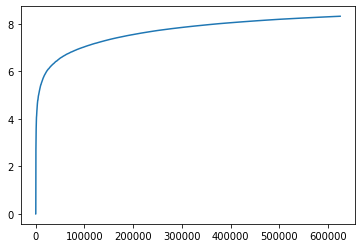

In [11]:
plt.plot(df['probability_best_arm_chosen'])

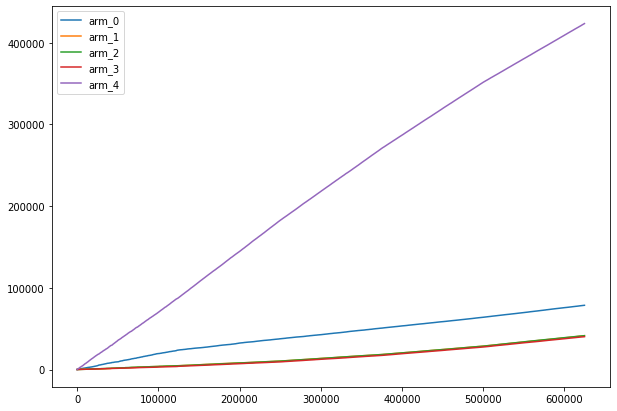

In [18]:
plt.figure(figsize=(10, 7))
plt.plot(df['arm_0'], label='arm_0')
plt.plot(df['arm_1'], label='arm_1')
plt.plot(df['arm_2'], label='arm_2')
plt.plot(df['arm_3'], label='arm_3')
plt.plot(df['arm_4'], label='arm_4')
plt.legend()
plt.show()

In [14]:
v = pd.Series([1., 3., 1., np.nan, 1., 1., 1., 1., np.nan, 1.])
v

0    1.0
1    3.0
2    1.0
3    NaN
4    1.0
5    1.0
6    1.0
7    1.0
8    NaN
9    1.0
dtype: float64

In [17]:
cumsum = v.cumsum().fillna(method='pad')
cumsum

0     1.0
1     4.0
2     5.0
3     5.0
4     6.0
5     7.0
6     8.0
7     9.0
8     9.0
9    10.0
dtype: float64

In [18]:
reset = -cumsum[v.isnull()].diff().fillna(cumsum)
reset

3   -5.0
8   -4.0
dtype: float64

In [20]:
result = v.where(v.notnull(), reset).cumsum()
result

0    1.0
1    4.0
2    5.0
3    0.0
4    1.0
5    2.0
6    3.0
7    4.0
8    0.0
9    1.0
dtype: float64

In [ ]:
pd.DataFrame()

In [132]:
data = pd.DataFrame([[0, 0, 0],
                     [0, 1, 0],
                     [0, 2, 1],
                     [0, 3, 0],
                     [1, 0, 1],
                     [1, 1, 0],
                     [1, 2, 0],
                     [1, 3, 1],
                     [2, 0, 0],
                     [2, 1, 1],
                     [2, 2, 1],
                     [2, 3, 1],
                     [0, 0, 0],
                     [0, 1, 1],
                     [0, 2, 1],
                     [0, 3, 0]],columns=['simulation', 'trial', 'success'])

In [133]:
data

,simulation,trial,success
0,0,0,0
1,0,1,0
2,0,2,1
3,0,3,0
4,1,0,1
5,1,1,0
6,1,2,0
7,1,3,1
8,2,0,0
9,2,1,1


In [134]:
cumsum = data['success'].cumsum()
reset = -cumsum[data['trial'] == 0].diff().fillna(cumsum)
data['cumsum'] = data['success'].where(data['trial'] != 0, reset).cumsum()
data

,simulation,trial,success,cumsum
0,0,0,0,0
1,0,1,0,0
2,0,2,1,1
3,0,3,0,1
4,1,0,1,-1
5,1,1,0,-1
6,1,2,0,-1
7,1,3,1,0
8,2,0,0,-1
9,2,1,1,0


In [119]:
pd.DataFrame({'success': data['success'],
             'cumsum': cumsum,
             'reset': reset,
             'result': data['cumsum']})

,success,cumsum,reset,result
0,0,0,-0.0,0
1,0,0,NaN,0
2,1,1,NaN,1
3,0,1,NaN,1
4,1,2,-2.0,-1
5,0,2,NaN,-1
6,0,2,NaN,-1
7,1,3,NaN,0
8,0,3,-1.0,-1
9,1,4,NaN,0


In [138]:
expected_result = [0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 3, 0, 1, 2, 2]

In [139]:
data['cumsum'].tolist()

[0, 0, 1, 1, -1, -1, -1, 0, -1, 0, 1, 2, -1, 0, 1, 1]

In [140]:
pd.DataFrame({'simulation': data['simulation'],
              'trial': data['trial'],
              'success': data['success'],
              'cumsum': cumsum,
              'reset': reset,
              'result': data['cumsum'],
              'expected_result': expected_result})

,simulation,trial,success,cumsum,reset,result,expected_result
0,0,0,0,0,-0.0,0,0
1,0,1,0,0,NaN,0,0
2,0,2,1,1,NaN,1,1
3,0,3,0,1,NaN,1,1
4,1,0,1,2,-2.0,-1,1
5,1,1,0,2,NaN,-1,1
6,1,2,0,2,NaN,-1,1
7,1,3,1,3,NaN,0,2
8,2,0,0,3,-1.0,-1,0
9,2,1,1,4,NaN,0,1


In [147]:
for idx, row in data.iterrows():
    if data['trial'][idx] == 0:
        cumsum = 0
    if data['success'][idx] == 1:
        cumsum += 1
    data['cumsum'][idx] = cumsum

In [148]:
data

,simulation,trial,success,cumsum
0,0,0,0,0
1,0,1,0,0
2,0,2,1,1
3,0,3,0,1
4,1,0,1,1
5,1,1,0,1
6,1,2,0,1
7,1,3,1,2
8,2,0,0,0
9,2,1,1,1


In [149]:
data.groupby(data.simulation.ne(data.simulation.shift()).cumsum())['success'].cumsum()

0     0
1     0
2     1
3     1
4     1
5     1
6     1
7     2
8     0
9     1
10    2
11    3
12    0
13    1
14    2
15    2
Name: success, dtype: int64

In [151]:
data.groupby((data.simulation!=data.simulation.shift()).cumsum())['success'].cumsum()

0     0
1     0
2     1
3     1
4     1
5     1
6     1
7     2
8     0
9     1
10    2
11    3
12    0
13    1
14    2
15    2
Name: success, dtype: int64